In [1]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

## Scikit-Learn 核心功能介绍

### sklearn核心对象类型：评估器

- 准备数据

In [2]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为0.01
features, labels = arrayGenReg(delta=0.01)

In [3]:
# 查看数据
features

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

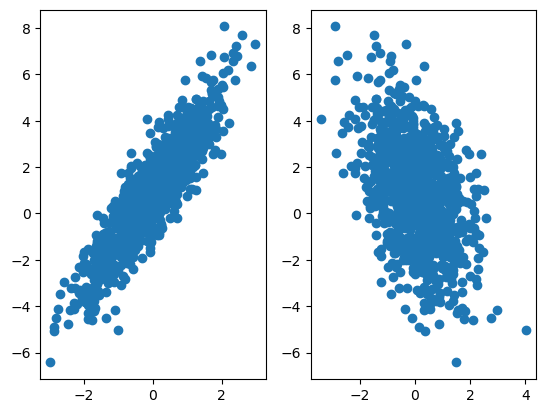

In [4]:
# 可视化数据分布
plt.subplot(121)
plt.plot(features[:, 0], labels, 'o')
plt.subplot(122)
plt.plot(features[:, 1], labels, 'o')

- 调用线性回归评估器

In [ ]:
# 方法一：直接导入sklearn
import sklearn
# 然后在sklearn里面的linear_model模块内查询LinearRegression评估器
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [7]:
# 方法二：直接导入sklearn内的linear_model模块
from sklearn import linear_model
# 然后在linear_model模块内查询LinearRegression评估器
linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [8]:
# 方法三：直接导入LinearRegression评估器
from sklearn.linear_model import LinearRegression
# 然后即可直接查询LinearRegression评估器
LinearRegression

sklearn.linear_model._base.LinearRegression

In [9]:
model = LinearRegression()

In [11]:
X = features[:, :2]           # 特征矩阵
y = labels                    # 标签数组

In [12]:
# 调用评估器中的fit方法进行模型训练
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 查看自变量参数
model.coef_

array([[ 1.99961892, -0.99985281]])

In [14]:
# 查看模型截距
model.intercept_

array([0.99970541])

In [ ]:
# 对比最小二乘法
np.linalg.lstsq(features, labels, rcond=-1)[0]

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

- 利用模型进行数值预测

In [16]:
model.predict(X)[:10]

array([[ 4.42754333],
       [ 1.35792976],
       [ 0.29698247],
       [ 1.83264567],
       [-2.47201615],
       [ 0.46806169],
       [ 2.8184199 ],
       [-0.81254525],
       [ 2.84841913],
       [ 0.81582296]])

In [17]:
y[:10]

array([[ 4.43811826],
       [ 1.375912  ],
       [ 0.30286597],
       [ 1.81970897],
       [-2.47783626],
       [ 0.47374318],
       [ 2.83085905],
       [-0.83695165],
       [ 2.84344069],
       [ 0.8176895 ]])

### sklearn第二类重要对象类型（实用函数）

In [18]:
# 在metrics模块下导入MSE计算函数
from sklearn.metrics import mean_squared_error

In [19]:
# 输入数据，进行计算
mean_squared_error(model.predict(X), y)

9.300731379745628e-05

In [20]:
l = model.coef_.flatten().tolist()
l.extend(model.intercept_.tolist())
l

[1.9996189241115236, -0.9998528065894627, 0.999705410155171]

In [21]:
w = np.array(l).reshape(-1, 1)
w

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

In [22]:
# 对比手动计算的MSE计算结果
MSELoss(features, w, y)

array([[9.30073138e-05]])

### 模型实例化与超参数设置

In [23]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    tol=1e-06,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

tol : float, default=1e-6
    The precision of the solution (`coef_`) is determined by `tol` which
    specifies a different convergence criterion for the `lsqr` solver.
    `tol` is set as `atol` and `btol` of `scipy.sparse.linalg.lsqr` when
    fitting on sparse training data. Th

In [25]:
model1 = LinearRegression(fit_intercept=False)
model1

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [26]:
model1.get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [28]:
model.set_params(fit_intercept=False)

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
model.coef_

array([[ 1.99961892, -0.99985281]])

In [30]:
model.intercept_

array([0.99970541])

In [31]:
model.fit(X,y)

,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
model.coef_, model.intercept_

(array([[ 1.93291366, -0.96799981]]), 0.0)

In [33]:
# 训练后模型属性
model.rank_

2

In [34]:
# 训练前模型无该属性
model1.rank_

AttributeError: 'LinearRegression' object has no attribute 'rank_'

## Scikit-Learn常用功能介绍

### sklearn 中的数据集读取

In [35]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [36]:
# 查看读取结果
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
type(iris_data)

sklearn.utils._bunch.Bunch

In [38]:
# 返回特征
iris_data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [39]:
# 返回标签
iris_data.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
# 返回各列名称
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [45]:
# 返回标签各类别名称
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
# 只返回X和y两个对象
X, y = load_iris(return_X_y=True)

In [48]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [49]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
# 创建DataFrame对象
iris_dataFrame = load_iris(as_frame=True)
iris_dataFrame.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### sklearn中的数据集切分方法

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# 查阅该函数的帮助文档
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [54]:
X = np.arange(12).reshape((6, 2))
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [55]:
y = np.array([0, 0, 0, 1, 1, 1])

In [56]:
train_test_split(X, y, random_state=42)

[array([[10, 11],
        [ 4,  5],
        [ 8,  9],
        [ 6,  7]]),
 array([[0, 1],
        [2, 3]]),
 array([1, 0, 1, 1]),
 array([0, 0])]

In [57]:
train_test_split(X, y, random_state=24)

[array([[2, 3],
        [0, 1],
        [6, 7],
        [4, 5]]),
 array([[ 8,  9],
        [10, 11]]),
 array([0, 0, 1, 0]),
 array([1, 1])]

In [58]:
train_test_split(X, y, stratify=y, random_state=42)

[array([[ 2,  3],
        [10, 11],
        [ 0,  1],
        [ 8,  9]]),
 array([[6, 7],
        [4, 5]]),
 array([0, 1, 0, 1]),
 array([1, 0])]

In [59]:
train_test_split(X, y, stratify=y, random_state=24)

[array([[ 0,  1],
        [10, 11],
        [ 8,  9],
        [ 2,  3]]),
 array([[6, 7],
        [4, 5]]),
 array([0, 1, 1, 0]),
 array([1, 0])]

### sklearn中的数据标准化与归一化

In [60]:
from sklearn import preprocessing

#### 标准化 Standardization

- Z-Score标准化的函数实现方法

In [61]:
# Z-Score
preprocessing.scale?

Signature: preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)
Docstring:
Standardize a dataset along any axis.

Center to the mean and component wise scale to unit variance.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to center and scale.

axis : {0, 1}, default=0
    Axis used to compute the means and standard deviations along. If 0,
    independently standardize each feature, otherwise (if 1) standardize
    each sample.

with_mean : bool, default=True
    If True, center the data before scaling.

with_std : bool, default=True
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

copy : bool, default=True
    If False, try to avoid a copy and scale in place.
    This is not guaranteed to always work in place; e.g. if the data is
    a numpy array with an int dtype, a copy will be returned even with
    co

In [62]:
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [63]:
preprocessing.scale(X)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [64]:
# 对比此前定义的函数处理结果
z_score(X)

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

- Z-Score标准化的评估器实现方法

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# 查阅参数
StandardScaler?

Init signature: StandardScaler(*, copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

.. code-block:: text

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as th

In [67]:
scaler = StandardScaler()

In [68]:
X = np.arange(15).reshape(5, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [72]:
X_train, X_test = train_test_split(X)
X_train, X_test

(array([[ 0,  1,  2],
        [ 3,  4,  5],
        [12, 13, 14]]),
 array([[ 6,  7,  8],
        [ 9, 10, 11]]))

In [73]:
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [74]:
# 查看训练数据各列的标准差
scaler.scale_

array([5.09901951, 5.09901951, 5.09901951])

In [75]:
# 查看训练数据各列的均值
scaler.mean_

array([5., 6., 7.])

In [76]:
# 查看训练数据各列的方差
scaler.var_

array([26., 26., 26.])

In [77]:
np.sqrt(scaler.var_)

array([5.09901951, 5.09901951, 5.09901951])

In [78]:
# 总共有效的训练数据条数
scaler.n_samples_seen_

np.int64(3)

In [79]:
X_train

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [12, 13, 14]])

In [80]:
# 利用训练集的均值和方差对训练集进行标准化处理
scaler.transform(X_train)

array([[-0.98058068, -0.98058068, -0.98058068],
       [-0.39223227, -0.39223227, -0.39223227],
       [ 1.37281295,  1.37281295,  1.37281295]])

In [81]:
# 利用训练集的均值和方差对测试集进行标准化处理
scaler.transform(X_test)

array([[0.19611614, 0.19611614, 0.19611614],
       [0.78446454, 0.78446454, 0.78446454]])

In [ ]:
# 对比此前定义的函数处理结果
z_score(X_train)

array([[-0.98058068, -0.98058068, -0.98058068],
       [-0.39223227, -0.39223227, -0.39223227],
       [ 1.37281295,  1.37281295,  1.37281295]])

In [83]:
# 直接使用fit_transform进行转化
scaler = StandardScaler()

# 一步执行在X_train上fit和transfrom两个操作
scaler.fit_transform(X_train)

array([[-0.98058068, -0.98058068, -0.98058068],
       [-0.39223227, -0.39223227, -0.39223227],
       [ 1.37281295,  1.37281295,  1.37281295]])

- 0-1标准化的函数实现方法

In [84]:
# 查看函数说明文档
preprocessing.minmax_scale?

Signature: preprocessing.minmax_scale(X, feature_range=(0, 1), *, axis=0, copy=True)
Docstring:
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, i.e. between
zero and one.

The transformation is given by (when ``axis=0``)::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

The transformation is calculated as (when ``axis=0``)::

   X_scaled = scale * X + min - X.min(axis=0) * scale
   where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))

This transformation is often used as an alternative to zero mean,
unit variance scaling.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

.. versionadded:: 0.17
   *minmax_scale* function interface
   to :class:`~sklearn.preprocessing.MinMaxScaler`.

Parameters
----------
X : array-like of shape (n_samples, n_feat

In [85]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [86]:
preprocessing.minmax_scale(X)

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [87]:
# 对比自定义函数计算结果
maxmin_norm(X)

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

- 0-1标准化的评估器实现方法

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
MinMaxScaler?

Init signature: MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
Docstring:     
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such
that it is in the given range on the training set, e.g. between
zero and one.

The transformation is given by::

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean,
unit variance scaling.

`MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
scales them down into a fixed range, where the largest occurring data point
corresponds to the maximum value and the smallest one corresponds to the
minimum value. For an example visualization, refer to :ref:`Compare
MinMaxScaler with other scalers <plot_all_scaling_minmax_scaler_section>`.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters

In [90]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  ]])

In [91]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [92]:
scaler.data_min_

array([0., 1., 2.])

In [93]:
scaler.data_max_

array([12., 13., 14.])

#### 归一化 Normalization

- 归一化的函数实现方法

In [94]:
preprocessing.normalize?

Signature:
preprocessing.normalize(
    X,
    norm='l2',
    *,
    axis=1,
    copy=True,
    return_norm=False,
)
Docstring:
Scale input vectors individually to unit norm (vector length).

Read more in the :ref:`User Guide <preprocessing_normalization>`.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to normalize, element by element.
    scipy.sparse matrices should be in CSR format to avoid an
    un-necessary copy.

norm : {'l1', 'l2', 'max'}, default='l2'
    The norm to use to normalize each non zero sample (or each non-zero
    feature if axis is 0).

axis : {0, 1}, default=1
    Define axis used to normalize the data along. If 1, independently
    normalize each sample, otherwise (if 0) normalize each feature.

copy : bool, default=True
    If False, try to avoid a copy and normalize in place.
    This is not guaranteed to always work in place; e.g. if the data is
    a numpy array with an int dtype, a copy will be returned

In [95]:
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [96]:
# 1-范数单位化过程
preprocessing.normalize(X, norm='l1')

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667],
       [0.30769231, 0.33333333, 0.35897436]])

In [98]:
np.linalg.norm(X, ord=1, axis=1)

array([ 3., 12., 21., 30., 39.])

In [99]:
np.sum(X, axis=1)

array([ 3, 12, 21, 30, 39])

In [100]:
X / np.linalg.norm(X, ord=1, axis=1).reshape(5, 1)

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667],
       [0.30769231, 0.33333333, 0.35897436]])

In [101]:
# 2-范数单位化过程
preprocessing.normalize(X, norm='l2')

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887],
       [0.53189065, 0.57621487, 0.62053909]])

In [102]:
np.linalg.norm(X, ord=2, axis=1)

array([ 2.23606798,  7.07106781, 12.20655562, 17.3781472 , 22.56102835])

In [103]:
np.sqrt(np.sum(np.power(X, 2), axis=1))

array([ 2.23606798,  7.07106781, 12.20655562, 17.3781472 , 22.56102835])

In [104]:
X / np.linalg.norm(X, ord=2, axis=1).reshape(5, 1)

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887],
       [0.53189065, 0.57621487, 0.62053909]])

In [105]:
# 范数单位化结果
np.linalg.norm(preprocessing.normalize(X, norm='l2'), ord=2, axis=1)

array([1., 1., 1., 1., 1.])

- 归一化评估器实现方法

In [106]:
from sklearn.preprocessing import Normalizer

In [107]:
Normalizer?

Init signature: Normalizer(norm='l2', *, copy=True)
Docstring:     
Normalize samples individually to unit norm.

Each sample (i.e. each row of the data matrix) with at least one
non zero component is rescaled independently of other samples so
that its norm (l1, l2 or inf) equals one.

This transformer is able to work both with dense numpy arrays and
scipy.sparse matrix (use CSR format if you want to avoid the burden of
a copy / conversion).

Scaling inputs to unit norms is a common operation for text
classification or clustering for instance. For instance the dot
product of two l2-normalized TF-IDF vectors is the cosine similarity
of the vectors and is the base similarity metric for the Vector
Space Model commonly used by the Information Retrieval community.

For an example visualization, refer to :ref:`Compare Normalizer with other
scalers <plot_all_scaling_normalizer_section>`.

Read more in the :ref:`User Guide <preprocessing_normalization>`.

Parameters
----------
norm : {'l1', 'l

In [108]:
normlize = Normalizer()
normlize.fit_transform(X)

array([[0.        , 0.4472136 , 0.89442719],
       [0.42426407, 0.56568542, 0.70710678],
       [0.49153915, 0.57346234, 0.65538554],
       [0.5178918 , 0.57543534, 0.63297887],
       [0.53189065, 0.57621487, 0.62053909]])

In [109]:
normlize = Normalizer(norm='l1')
normlize.fit_transform(X)

array([[0.        , 0.33333333, 0.66666667],
       [0.25      , 0.33333333, 0.41666667],
       [0.28571429, 0.33333333, 0.38095238],
       [0.3       , 0.33333333, 0.36666667],
       [0.30769231, 0.33333333, 0.35897436]])

### 使用逻辑回归评估器

In [110]:
# 导入逻辑回归评估器
from sklearn.linear_model import LogisticRegression

In [111]:
# 数据准备
X, y = load_iris(return_X_y=True)

In [112]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [113]:
# 实例化模型，使用默认参数
clf_test = LogisticRegression(max_iter=1000, multi_class='multinomial')

In [114]:
# 带入全部数据进行训练
clf_test.fit(X, y)

/opt/anaconda3/envs/mllearn/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


In [115]:
# 查看线性方程系数
clf_test.coef_

array([[-0.4193816 ,  0.96695534, -2.51933816, -1.0844501 ],
       [ 0.53089403, -0.31492136, -0.20222015, -0.94422006],
       [-0.11151242, -0.65203398,  2.72155831,  2.02867016]])

In [116]:
# 在全部数据集上进行预测
clf_test.predict(X)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [117]:
# 查看概率预测结果
clf_test.predict_proba(X)[:10]

array([[9.81689177e-01, 1.83108090e-02, 1.44563505e-08],
       [9.71554266e-01, 2.84457041e-02, 3.02252302e-08],
       [9.85356997e-01, 1.46429906e-02, 1.23458818e-08],
       [9.76164542e-01, 2.38354181e-02, 3.97750969e-08],
       [9.85298536e-01, 1.47014517e-02, 1.19665815e-08],
       [9.70294496e-01, 2.97054299e-02, 7.36347243e-08],
       [9.86805968e-01, 1.31940120e-02, 1.99975320e-08],
       [9.76267938e-01, 2.37320341e-02, 2.76824268e-08],
       [9.79724310e-01, 2.02756589e-02, 3.07231195e-08],
       [9.68973567e-01, 3.10264010e-02, 3.17183669e-08]])

In [118]:
clf_test.score(X, y)

0.9733333333333334

In [119]:
# 进行准确率计算
from sklearn.metrics import accuracy_score
accuracy_score(y, clf_test.predict(X))

0.9733333333333334

### sklearn中的构建机器学习流

In [120]:
from sklearn.pipeline import make_pipeline

In [121]:
make_pipeline?

Signature: make_pipeline(*steps, memory=None, transform_input=None, verbose=False)
Docstring:
Construct a :class:`Pipeline` from the given estimators.

This is a shorthand for the :class:`Pipeline` constructor; it does not
require, and does not permit, naming the estimators. Instead, their names
will be set to the lowercase of their types automatically.

Parameters
----------
*steps : list of Estimator objects
    List of the scikit-learn estimators that are chained together.

memory : str or object with the joblib.Memory interface, default=None
    Used to cache the fitted transformers of the pipeline. The last step
    will never be cached, even if it is a transformer. By default, no
    caching is performed. If a string is given, it is the path to the
    caching directory. Enabling caching triggers a clone of the transformers
    before fitting. Therefore, the transformer instance given to the
    pipeline cannot be inspected directly. Use the attribute ``named_steps``
    or ``ste

In [122]:
# 在make_pipeline中输入评估器的过程同时对评估器类进行参数设置
pipe = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000))

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [124]:
pipe.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [125]:
pipe.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [126]:
pipe.score(X_test, y_test)

1.0

In [127]:
pipe.score(X_train, y_train)

0.9642857142857143

### sklearn的模型保存

In [128]:
import joblib

In [129]:
joblib.dump?

Signature: joblib.dump(value, filename, compress=0, protocol=None)
Docstring:
Persist an arbitrary Python object into one file.

Read more in the :ref:`User Guide <persistence>`.

Parameters
----------
value: any Python object
    The object to store to disk.
filename: str, pathlib.Path, or file object.
    The file object or path of the file in which it is to be stored.
    The compression method corresponding to one of the supported filename
    extensions ('.z', '.gz', '.bz2', '.xz' or '.lzma') will be used
    automatically.
compress: int from 0 to 9 or bool or 2-tuple, optional
    Optional compression level for the data. 0 or False is no compression.
    Higher value means more compression, but also slower read and
    write times. Using a value of 3 is often a good compromise.
    See the notes for more details.
    If compress is True, the compression level used is 3.
    If compress is a 2-tuple, the first element must correspond to a string
    between supported compressors (

In [130]:
joblib.dump(pipe,'pipe.model')

['pipe.model']

In [131]:
pipe1 = joblib.load('pipe.model')

In [132]:
pipe1.score(X_train, y_train)

0.9642857142857143